In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


In [23]:
# Load cleaned dataset
df = pd.read_csv('../data/processed/cleaned_googleplaystore.csv')

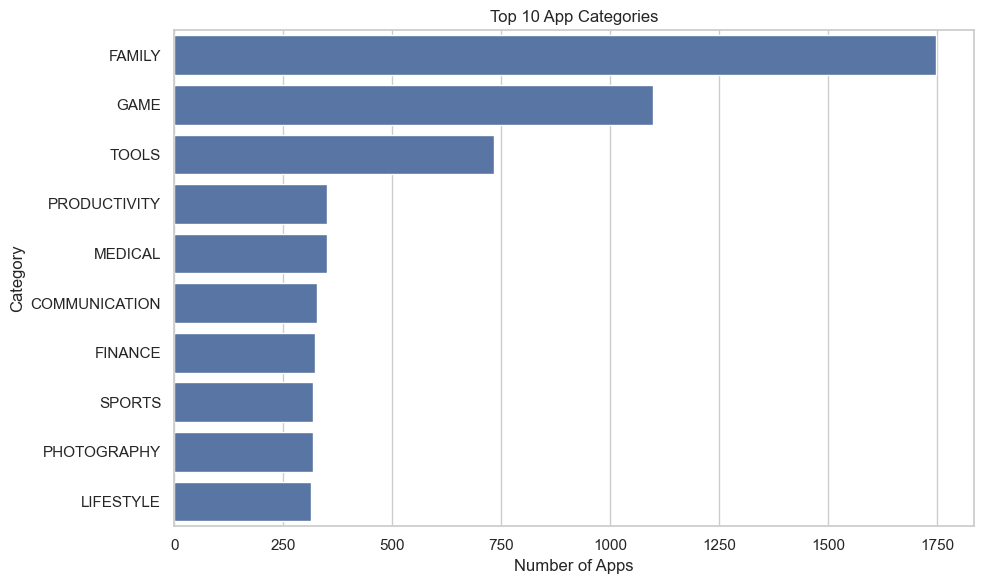

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index[:10])
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('../output/figures/categor_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

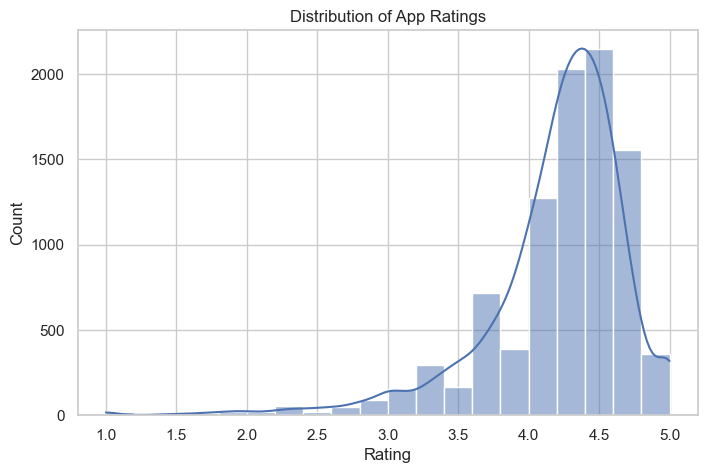

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('../output/figures/rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


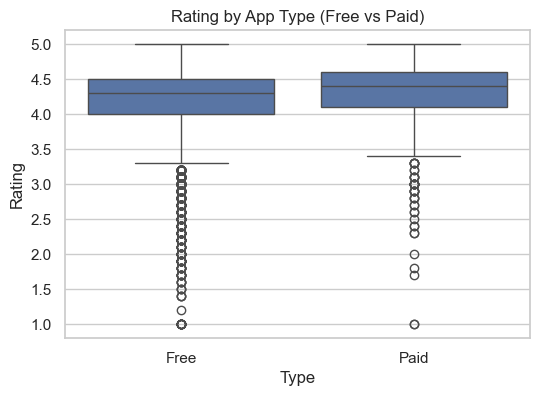

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating by App Type (Free vs Paid)')
plt.savefig('../output/figures/type_vs_rating.png')
plt.show()


In [9]:
plt.figure(figsize=(7,4))
sns.countplot(y='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.savefig('../output/figures/content_rating_distribution.png')
plt.show()


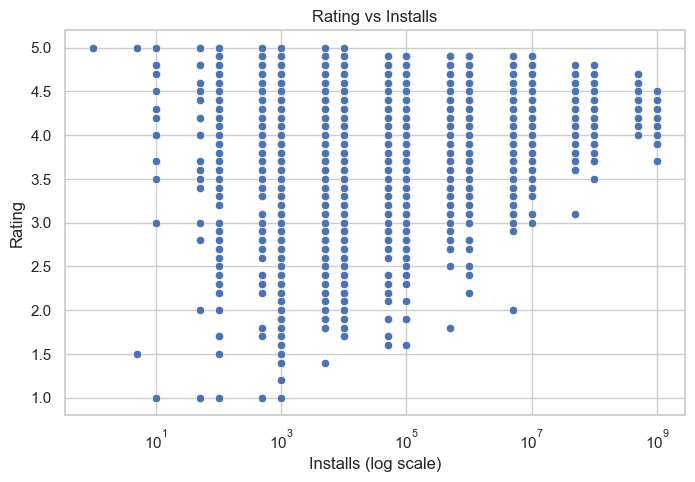

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.title('Rating vs Installs')
plt.xscale('log')
plt.xlabel('Installs (log scale)')
plt.ylabel('Rating')
plt.savefig('../output/figures/installs_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:
# Clean 'Price'
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean 'Installs'
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Ensure 'Reviews' is numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop rows with missing values in numeric columns
df = df.dropna(subset=['Rating', 'Reviews', 'Installs', 'Price'])

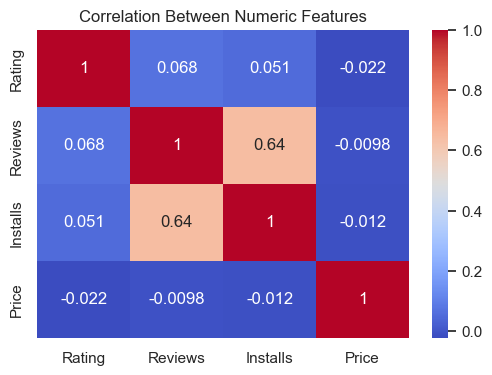

In [29]:
# Select numeric features
numeric_df = df[['Rating', 'Reviews', 'Installs', 'Price']]

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.savefig('../output/figures/numeric_feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
